In [1]:
from src.estimation import estimate_text_distribution
from src.MLE import MLE

ModuleNotFoundError: No module named 'scipy'

In [2]:
import pandas as pd
df = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/validation_data/CS/ground_truth_alpha_0.025.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [13]:
import pandas as pd
word_ai_cs = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/CS/ai_data.parquet')
word_human_cs = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/CS/human_data.parquet')
word_ai_eess = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/EESS/ai_data.parquet')
word_human_eess= pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/EESS/human_data.parquet')
word_ai_math = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Math/ai_data.parquet')
word_human_math = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Math/human_data.parquet')
word_ai_phys = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Phys/ai_data.parquet')
word_human_phys = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Phys/human_data.parquet')
word_ai_stat = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Stat/ai_data.parquet')
word_human_stat = pd.read_parquet('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/Mapping-the-Increasing-Use-of-LLMs-in-Scientific-Papers/data/training_data/Stat/human_data.parquet')

In [14]:
word_ai = pd.concat([word_ai_cs, word_ai_eess, word_ai_math, word_ai_phys, word_ai_stat], ignore_index=True)
word_human = pd.concat([word_human_cs, word_human_eess, word_human_math, word_human_phys, word_human_stat], ignore_index=True)

In [15]:
from math import log

sum_human_tokens = 0
sum_ai_tokens = 0
vocabulary = {}

for row in word_human['human_sentence']:
    sum_human_tokens += len(row)
    for token in row:
        if token in vocabulary:
            vocabulary[token]['human']['absolute'] += 1
        else:
            vocabulary[token] = {'human': {'absolute': 1, 'frequency': 0}, 'ai': {'absolute': 0, 'frequency': 0}}

for row in word_ai['ai_sentence']:
    sum_ai_tokens += len(row)
    for token in row:
        if token in vocabulary:
            vocabulary[token]['ai']['absolute'] += 1
        else:
            vocabulary[token] = {'human': {'absolute': 0, 'frequency': 0}, 'ai': {'absolute': 1, 'frequency': 0}}

for word in vocabulary:
    vocabulary[word]['human']['frequency'] = vocabulary[word]['human']['absolute']/sum_human_tokens
    vocabulary[word]['ai']['frequency'] = vocabulary[word]['ai']['absolute']/sum_ai_tokens

print(f'Human total: {sum_human_tokens}, ai total: {sum_ai_tokens}')

Human total: 3640550, ai total: 6730588


In [184]:
import openpyxl

ai = ['understanding', 'researchers', 'approach', 'intricate', 'crucial', 'realm', 'insights', 'significant', 'research', 'various', 'study', 'analysis', 'systems', 'behavior', 'potential', 'light', 'framework', 'process', 'scenarios', 'comprehensive']
human = ['show', 'paper', 'using', 'based', 'propose', 'used', 'problem', 'use', 'work', 'time', 'first', 'results', 'well', 'state', 'present', 'large', 'number', 'many', 'model', 'find']

ai_and_human_words = ai + human

ai_values = []
human_values = []

for word in ai_and_human_words:
    ai_values.append(vocabulary[word]['ai']['frequency'])
    human_values.append(vocabulary[word]['human']['frequency'])

import pandas as pd
hello = pd.DataFrame(list(zip(ai_and_human_words, ai_values, human_values)),
               columns =['Words', 'Ai Fr', 'Hum Fr'])

hello.to_excel('data (20 top ai and then 20 top human).xlsx')

In [ ]:
ai_freq = {}
for word in vocabulary:
    ai_freq[word] = vocabulary[word]['ai']['frequency']
ai_favd = sorted(ai_freq, key=ai_freq.get, reverse=True)[:100]

In [ ]:
hum_freq = {}
for word in vocabulary:
    hum_freq[word] = vocabulary[word]['human']['frequency']
hum_favd = sorted(hum_freq, key=hum_freq.get, reverse=True)[:100]

In [18]:
ai_best = sorted(ai_freq.values(), reverse=True)[:100]
hum_best = sorted(hum_freq.values(), reverse=True)[:100]

In [185]:
print(ai_favd[:20])
print(hum_favd[:20])
print(human_favourites[:20])
print(ai_favourites[:20])

['the', 'of', 'and', 'a', 'in', 'to', 'this', 'for', 'by', 'is', 'these', 'on', 'that', 'with', 'as', 'into', 'within', 'data', 'its', 'approach']
['the', 'of', 'and', 'a', 'to', 'in', 'we', 'is', 'for', 'that', 'with', 'on', 'this', 'are', 'by', 'as', 'an', 'from', 'which', 'be']
['we', 'is', 'are', 'that', 'with', 'an', 'which', 'our', 'be', 'show', 'paper', 'using', 'based', 'propose', 'for', 'two', 'and', 'used', 'on', 'problem']
['the', 'this', 'of', 'these', 'within', 'in', 'into', 'by', 'understanding', 'its', 'researchers', 'through', 'approach', 'intricate', 'crucial', 'realm', 'insights', 'significant', 'research', 'their']


In [19]:
frequency_differences = {}
for word in vocabulary:
    frequency_differences[word] = (vocabulary[word]['ai']['frequency'])-(vocabulary[word]['human']['frequency'])
ai_favourites = sorted(frequency_differences, key=frequency_differences.get, reverse=True)[:1000]
human_favourites = sorted(frequency_differences, key=frequency_differences.get)[:1000]

In [279]:
frequency_ai_differences_divided_by_human = {}
for word in vocabulary:
    if vocabulary[word]['human']['frequency'] !=0:
        frequency_ai_differences_divided_by_human[word] = (vocabulary[word]['ai']['frequency']-vocabulary[word]['human']['frequency'])/vocabulary[word]['human']['frequency']
        
frequency_human_differences_divided_by_ai = {}
for word in vocabulary:
    if vocabulary[word]['ai']['frequency'] !=0:
        frequency_human_differences_divided_by_ai[word] = (vocabulary[word]['human']['frequency']-vocabulary[word]['ai']['frequency'])/vocabulary[word]['ai']['frequency']
        
frequency_favs_ai = sorted(frequency_ai_differences_divided_by_human, key=frequency_ai_differences_divided_by_human.get, reverse=True)[:1000]
frequency_favs_human = sorted(frequency_human_differences_divided_by_ai, key=frequency_human_differences_divided_by_ai.get, reverse=True)[:1000]

In [281]:
with open('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/ads_nasa_api/count_papers_ai_favs_articles_best_of_best.json') as f:
    count_papers_ai_favs = json.load(f)

lol = frequency_favs_ai[:20]
lolhuman = frequency_favs_human[:20]
list_lol = []
list_lolhuman = []
for word in lol:
    list_lol.append(frequency_ai_differences_divided_by_human[word])
for word in lolhuman:
    list_lolhuman.append(frequency_human_differences_divided_by_ai[word])

zipped = list(zip(lol, list_lol))
zipped_human = list(zip(lolhuman, list_lolhuman))

ai_pd = pd.DataFrame(zipped, columns=['Word', 'Difference'])
human_pd = pd.DataFrame(zipped_human, columns=['Word', 'Difference'])
ai_pd.to_csv('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/ads_nasa_api/data_ai.csv')
human_pd.to_csv('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/ads_nasa_api/data_human.csv')

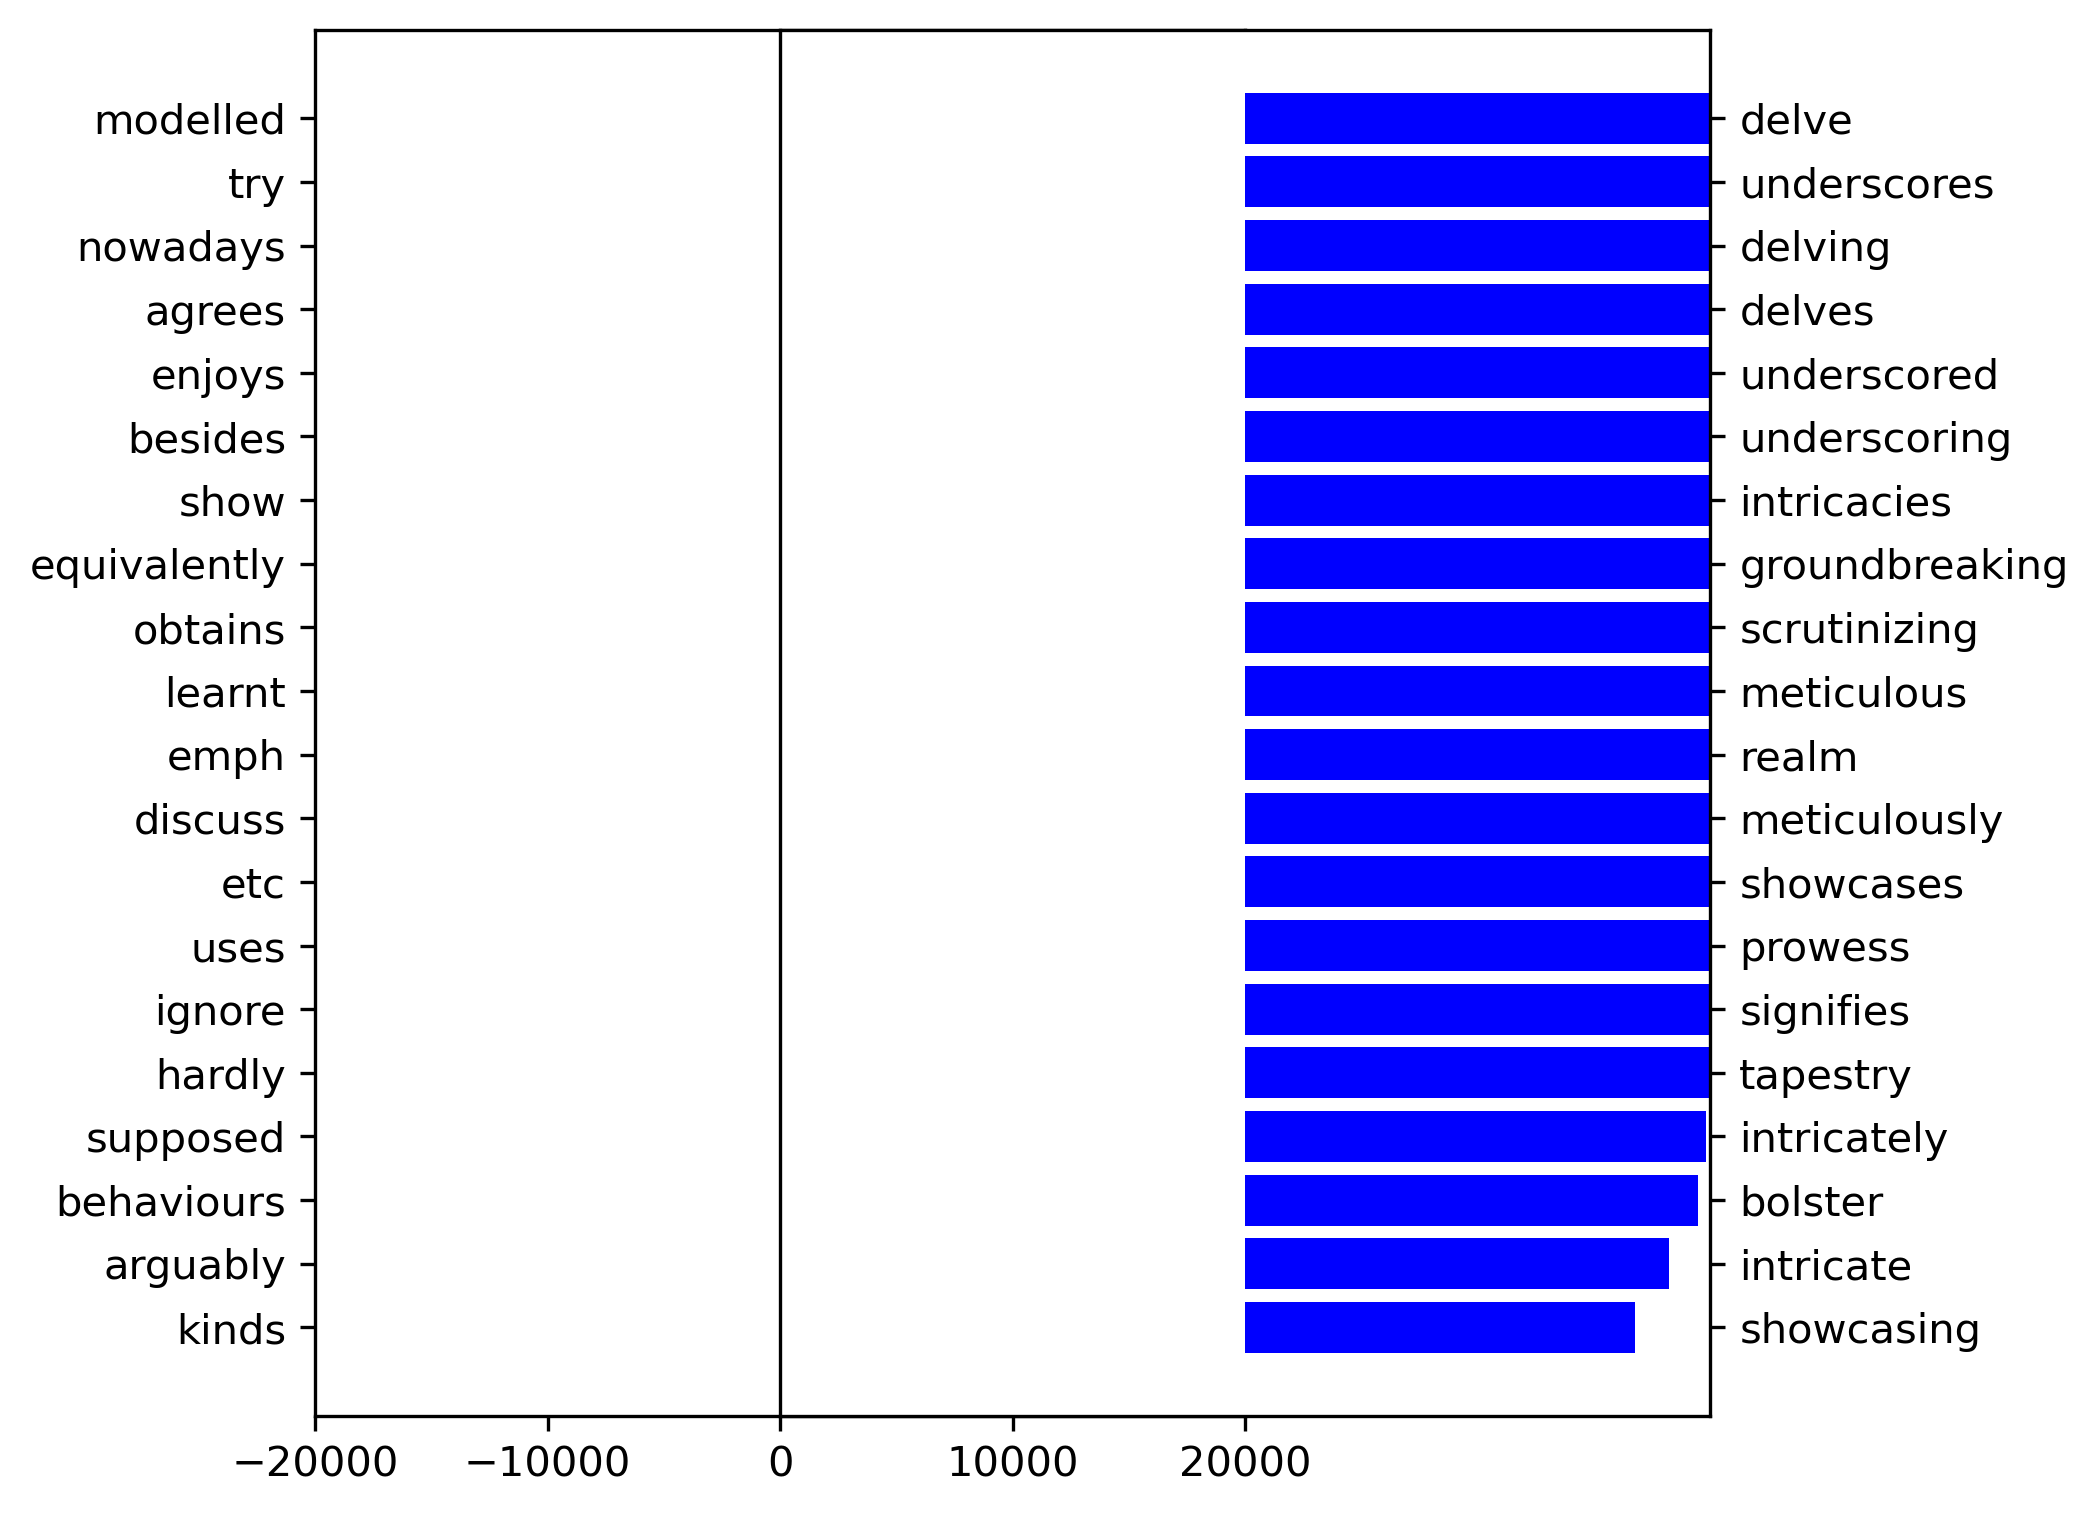

In [278]:
import matplotlib.pyplot as plt

# Separate the two dataframes and sort them
ai_pd = ai_pd.copy().sort_values('Difference', ascending=True)
human_pd = human_pd.copy().sort_values('Difference', ascending=True)

# Create a figure with two subplots sharing the same x-axis
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(6,6), dpi=300)

# Plot the human-favored words on the right subplot
axes[0].barh(human_pd['Word'], human_pd['Difference'], color='r')
#axes[0].set(title='Human-favored (left) vs AI-favored (right) words') 
# Center title over both subplots
#axes[0].title.set_position([0.5, 1.05])
#axes[0].set_xlabel('How many more ')  # set x-axis label
axes[0].set_xlim(-20000, 20000)  # set x-axis limits

# Plot the AI-favored words on the left subplot
axes[1].barh(ai_pd['Word'], ai_pd['Difference'], color='b')
axes[1].yaxis.tick_right()  # move y-axis ticks to the right side
# axes[1].set_xlabel('Difference')  # set x-axis label
axes[1].set_xlim(-20000, 20000)  # set x-axis limits
# Disable x ticks on the right subplot
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove space between the two subplots
plt.subplots_adjust(wspace=-0.5, hspace=0)

# Display the plot
plt.show()

In [248]:
import pandas as pd
import seaborn as sns

df = pd.read_json("/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/ads_nasa_api/count_papers_ai_favs_articles_best_of_best.json")
df = df.T



ModuleNotFoundError: No module named 'seaborn'

In [241]:
print(frequency_favs_ai)
print(frequency_favs_human)

['delve', 'underscores', 'delving', 'delves', 'underscored', 'underscoring', 'intricacies', 'groundbreaking', 'scrutinizing', 'meticulous', 'realm', 'meticulously', 'showcases', 'prowess', 'signifies', 'tapestry', 'intricately', 'bolster', 'intricate', 'showcasing', 'dissecting', 'mysteries', 'bolstering', 'unraveling', 'underscore', 'nuanced', 'revolutionize', 'transcends', 'elegance', 'glean', 'revolves', 'nuances', 'amalgamating', 'endeavors', 'underlining', 'embark', 'revolutionizing', 'scrutinized', 'deepen', 'renowned', 'illuminating', 'culminating', 'unearthed', 'solidifies', 'posits', 'culmination', 'pivotal', 'tangible', 'unveils', 'unravels', 'endeavor', 'commendable', 'profound', 'embarked', 'upholding', 'shines', 'fostering', 'adeptly', 'showcased', 'shedding', 'inquiries', 'fascinating', 'feat', 'unravel', 'interconnectedness', 'heightened', 'uphold', 'heralding', 'swiftly', 'elucidating', 'groundwork', 'gleaned', 'bolsters', 'streamlines', 'comprehending', 'elucidation', 

In [240]:
print(vocabulary['mixlingual'])

{'human': {'absolute': 2, 'frequency': 5.493675406188626e-07}, 'ai': {'absolute': 2, 'frequency': 2.971508581419632e-07}}


In [217]:
for key in frequency_ai_differences_divided_by_human:
    if 0.99 < frequency_ai_differences_divided_by_human[key] < 1.01:
        print(key)

typically
federated
events
bisimulation
also
artificial
forensics
generation
tracking
voice
speech
belonging
fft
sizes
retrieval
architecture
languages
gesture
indicator
architectures
range
treatment
communities
presentation
dimensionality
protection
titan
vlc
nads
power
projecting
dual
arose
interfaces
iterative
nli
batteries
proofs
wildfires
incorporate
points
facilities
motifs
situations
pollution
refers
twins
placement
controllers
percolation
nmt
circuits
spoken
decoding
collaboratively
artifact
sudden
failures
emojis
borders
fmp
periods
markets
eventual
hazards
uml
finds
thermodynamic
quantifies
homomorphisms
dip
evade
guidelines
drones
diver
prime
contenders
debunking
transitive
distances
retinopathy
sums
mfg
asr
tall
gmface
positional
parsers
imus
homes
certificate
propaganda
lpa
yoga
poems
fss
bregman
arrays
homology
panoramic
nca
suggestions
tnn
wsn
puf
plasma
twofold
skeletons
erasing
hirability
confronting
averages
rationality
multilayered
ece
crowds
ether
exceedingly
irreve

In [ ]:
print(frequency_favs_ai_20[:10])


In [196]:
frequency_differences_divided_by_human = {}
for word in vocabulary:
    if vocabulary[word]['ai']['frequency'] !=0:
        frequency_differences_divided_by_human[word] = (vocabulary[word]['human']['frequency'])/vocabulary[word]['ai']['frequency']

frequency_favs_human = sorted(frequency_differences_divided_by_human, key=frequency_differences_divided_by_human.get, reverse=True)[:100]
print(frequency_favs_human)

['modelled', 'try', 'nowadays', 'agrees', 'enjoys', 'besides', 'show', 'equivalently', 'obtains', 'learnt', 'emph', 'discuss', 'etc', 'uses', 'ignore', 'hardly', 'supposed', 'behaviours', 'arguably', 'kinds', 'behaviour', 'obvious', 'phys', 'huge', 'ignores', 'ignored', 'characterised', 'realizes', 'sim0', 'get', 'cheap', 'rev', 'keeps', 'cooperatively', 'propose', 'argue', 'conclude', 'whilst', 'myr', 'agree', 'inspect', 'facto', 'cbs', 'utilised', 'centres', 'decide', 'believe', 'want', 'unambiguously', 'because', 'admits', '100x', 'clarified', 'suppose', 'obey', 'plenty', 'normalised', 'adaption', '10x', 'presumably', 'hereby', 'disappear', 's_t', 'analysing', 'lot', 'sota', 'seldom', 'executes', 'picked', 'barely', 'prefers', 'explains', 'usually', 'routinely', 'develops', 'sends', 'enlarge', 'searched', 'covid19', 'evidences', 'provably', 'see', 'deal', 'expository', 'stoc', 'normalisation', 'wishes', 'ours', 'clinician', 'periodical', 'moir', 'notice', 'happen', 'enough', 'postul

In [201]:
vocabulary['realm']

{'human': {'absolute': 22, 'frequency': 6.043042946807488e-06},
 'ai': {'absolute': 11304, 'frequency': 0.0016794966502183763}}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

Parameter Estimates:
A = 0.1330480730115866
B = 0.694437401466212
C = 1.1214941630348754

P-values:
A: 1.7319479184152442e-13
B: 1.3641842941503057e-05
C: 0.0


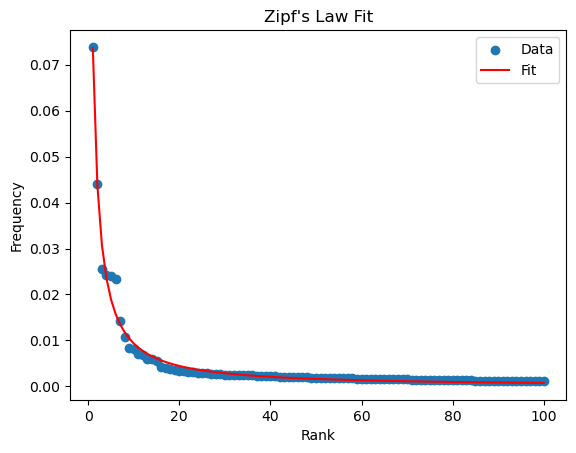

In [95]:
# Sample data (replace these with your actual data)
ranks = np.array(range(1,101))
frequencies = np.array(ai_best)

# Define the model function
def zipf_law(rank, A, B, C):
    return A / ((rank + B) ** C)

# Initial parameter estimates
initial_A = max(frequencies)
initial_B = 1
initial_C = 1
initial_params = [initial_A, initial_B, initial_C]

# Fit the model
try:
    params, covariance = curve_fit(zipf_law, ranks, frequencies, p0=initial_params)
    
    # Calculate standard errors and t-values for p-values
    perr = np.sqrt(np.diag(covariance))
    dof = max(0, len(ranks) - len(params))
    t_values = params / perr
    p_values = [2 * (1 - t.cdf(np.abs(i), dof)) for i in t_values]
    
    # Print parameter estimates and p-values
    print("Parameter Estimates:")
    print("A =", params[0])
    print("B =", params[1])
    print("C =", params[2])
    
    print("\nP-values:")
    print("A:", p_values[0])
    print("B:", p_values[1])
    print("C:", p_values[2])
    
    # Plot the data and the fit
    plt.scatter(ranks, frequencies, label='Data')
    plt.plot(ranks, zipf_law(ranks, *params), label='Fit', color='red')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law Fit')
    plt.legend()
    plt.show()
    
except RuntimeError as e:
    print("Error in fitting model:", e)

In [7]:
import pickle
import joblib
with open('/media/home/team_workspaces/universe-tbd/Sandor_Kruk/data/astro-ph_feeds_upto_23-May-2024.pkl', 'rb') as f:
    data = joblib.load(f)

In [27]:
print(data[0].keys())

dict_keys(['bozo', 'entries', 'feed', 'headers', 'encoding', 'version', 'namespaces'])


In [62]:
print(range(0,53))

range(0, 53)


In [35]:
print(data[0]['entries'][0].keys())

dict_keys(['id', 'guidislink', 'link', 'updated', 'updated_parsed', 'published', 'published_parsed', 'title', 'title_detail', 'summary', 'summary_detail', 'authors', 'author_detail', 'author', 'arxiv_comment', 'links', 'arxiv_primary_category', 'tags'])


In [75]:
print(len(data[0]['entries'][0]))

18


In [38]:
print(data[0]['entries'][0]['published'])

2005-11-17T16:26:58Z


In [ ]:
!/home/SASTARIT/.conda/envs/MLE/bin/python -m spacy download en_core_web_lg

In [9]:
import spacy
import re
nlp = spacy.load("en_core_web_lg")
def tokenize(text):
    """
    Processes the input text, splits it into sentences, and further processes each sentence
    to extract non-numeric words. It constructs a list of these words for each sentence.

    Parameters:
    text (str): A string containing multiple sentences.

    Returns:
    list: A list of lists, where each inner list contains the words from one sentence,
          excluding any numeric strings.
    """
    # remove newline characters, this line is not necessary for all cases
    # the reason it is included here is because the abstracts in the dataset contain abnormal newline characters
    # e.g. Recent works on diffusion models have demonstrated a strong capability for\nconditioning image generation,
    text=text.replace('\n',' ')
    # Initialize an empty list to store the list of words for each sentence
    sentence_list=[]
    # Process the sentence using the spacy model to extract linguistic features and split into components
    doc=nlp(text)
    # Iterate over each sentence in the processed text
    for sent in doc.sents:
        # Extract the words from the sentence
        words = re.findall(r'\b\w+\b', sent.text.lower())
        # Remove any words that are numeric
        words_without_digits=[word for word in words if not word.isdigit()]
        # If the list is not empty, append the list of words to the sentence_list
        if len(words_without_digits)!=0:
            sentence_list += words_without_digits
    return sentence_list

In [11]:
big_token_dictionary = {}

for entry_set in range(0,len(data)):
    for entry_subset in range(0,len(data[entry_set]['entries'])):
        year = data[entry_set]['entries'][entry_subset]['published'][:4]
        abstract = data[entry_set]['entries'][entry_subset]['summary']
        abstract_in_tokens = tokenize(abstract)
        if year in big_token_dictionary:
            big_token_dictionary[year] += abstract_in_tokens
        else:
            big_token_dictionary[year] = abstract_in_tokens

KeyboardInterrupt: 

In [30]:
import scipy
import json

In [171]:
with open('/media/home/team_workspaces/ESA-science-NLP/Simone_Astarita/delve_project/ads_nasa_api/count_papers_ai_favs_articles_best_of_best.json') as f:
    count_papers_ai_favs = json.load(f)

list_of_words = ['understanding', 'researchers', 'approach', 'intricate', 'crucial', 'realm', 'insights', 'significant', 'research', 'various', 'study', 'analysis', 'systems', 'behavior', 'potential', 'light', 'framework', 'process', 'scenarios', 'comprehensive', 'leveraging', 'enhancing', 'enhance', 'offering', 'key', 'innovative', 'complex', 'efficiency', 'particularly', 'valuable', 'role', 'challenges', 'techniques', 'exploration', 'novel', 'involves', 'effectively', 'efficacy', 'lies', 'properties', 'dynamics', 'context', 'practical', 'specific', 'diverse', 'mathematical', 'interplay', 'deeper', 'address', 'aspect', 'performance', 'traditional', 'effectiveness', 'one', 'applications', 'structures', 'overall', 'accuracy', 'play', 'ability', 'showcasing', 'theoretical', 'fundamental', 'capabilities', 'underlying', 'intriguing', 'underscores', 'pivotal', 'offers', 'ensuring', 'field', 'system', 'unique', 'implications', 'promising', 'investigation', 'conducted', 'characteristics', 'shedding', 'exploring', 'findings', 'delve', 'challenge', 'essential', 'notable', 'delves', 'world', 'advancements', 'reliability', 'utilization', 'enabling', 'processes', 'methodology', 'nature', 'critical', 'providing', 'robustness', 'tailored', 'making', 'concept']

for word in list_of_words:
    if count_papers_ai_favs[word]['absolute']['2024'] == 0:
        list_of_words.remove(word)

frequencies_2024 = []
frequencies_2023 = []
frequencies_2022 = []
frequencies_2021 = []
frequencies_2020 = []
frequencies_2019 = []
frequencies_2018 = []
frequencies_2017 = []
frequencies_2016 = []
frequencies_2015 = []
frequencies_2014 = []
frequencies_2013 = []
frequencies_2012 = []
frequencies_2011 = []
frequencies_2010 = []
frequencies_2009 = []
frequencies_2008 = []
frequencies_2007 = []
frequencies_2006 = []
frequencies_2005 = []
frequencies_2004 = []
frequencies_2003 = []
frequencies_2002 = []
frequencies_2001 = []
frequencies_2000 = []

for word in list_of_words:
    frequencies_2024.append(count_papers_ai_favs[word]['frequency']['2024'])
    frequencies_2023.append(count_papers_ai_favs[word]['frequency']['2023'])
    frequencies_2022.append(count_papers_ai_favs[word]['frequency']['2022'])
    frequencies_2021.append(count_papers_ai_favs[word]['frequency']['2021'])
    frequencies_2020.append(count_papers_ai_favs[word]['frequency']['2020'])
    frequencies_2019.append(count_papers_ai_favs[word]['frequency']['2019'])
    frequencies_2018.append(count_papers_ai_favs[word]['frequency']['2018'])
    frequencies_2017.append(count_papers_ai_favs[word]['frequency']['2017'])
    frequencies_2016.append(count_papers_ai_favs[word]['frequency']['2016'])
    frequencies_2015.append(count_papers_ai_favs[word]['frequency']['2015'])
    frequencies_2014.append(count_papers_ai_favs[word]['frequency']['2014'])
    frequencies_2013.append(count_papers_ai_favs[word]['frequency']['2013'])
    frequencies_2012.append(count_papers_ai_favs[word]['frequency']['2012'])
    frequencies_2011.append(count_papers_ai_favs[word]['frequency']['2011'])
    frequencies_2010.append(count_papers_ai_favs[word]['frequency']['2010'])
    frequencies_2009.append(count_papers_ai_favs[word]['frequency']['2009'])
    frequencies_2008.append(count_papers_ai_favs[word]['frequency']['2008'])
    frequencies_2007.append(count_papers_ai_favs[word]['frequency']['2007'])
    frequencies_2006.append(count_papers_ai_favs[word]['frequency']['2006'])
    frequencies_2005.append(count_papers_ai_favs[word]['frequency']['2005'])
    frequencies_2004.append(count_papers_ai_favs[word]['frequency']['2004'])
    frequencies_2003.append(count_papers_ai_favs[word]['frequency']['2003'])
    frequencies_2002.append(count_papers_ai_favs[word]['frequency']['2002'])
    frequencies_2001.append(count_papers_ai_favs[word]['frequency']['2001'])
    frequencies_2000.append(count_papers_ai_favs[word]['frequency']['2000'])

list_of_fr = [frequencies_2000, frequencies_2001, frequencies_2002, frequencies_2003, frequencies_2004, frequencies_2005, frequencies_2006, frequencies_2007, frequencies_2008,
              frequencies_2009, frequencies_2010, frequencies_2011, frequencies_2012, frequencies_2013, frequencies_2014, frequencies_2015, frequencies_2016, frequencies_2017,
              frequencies_2018, frequencies_2019, frequencies_2020, frequencies_2021, frequencies_2022, frequencies_2023, frequencies_2024]

In [172]:
from scipy.stats import ks_2samp
dictionary_pvalues = {}
number = 1999
for fr1 in list_of_fr:
    number += 1
    dictionary_pvalues[str(number)] = {}
    for fr2 in range(2000,2025):
        dictionary_pvalues[str(number)][str(fr2)] = ks_2samp(data1=fr1, data2=list_of_fr[fr2-2000])[1]

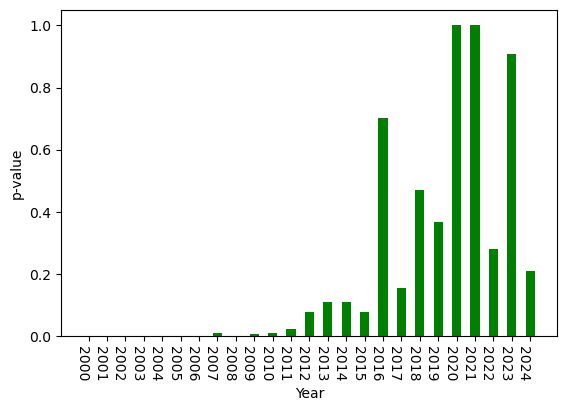

In [173]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
actual_graph = plt.bar(dictionary_pvalues['2020'].keys(), dictionary_pvalues['2020'].values(), 0.5, color='g')

ax.set_xlabel('Year')
ax.set_ylabel('p-value')
fig.autofmt_xdate(rotation=270)
plt.show()

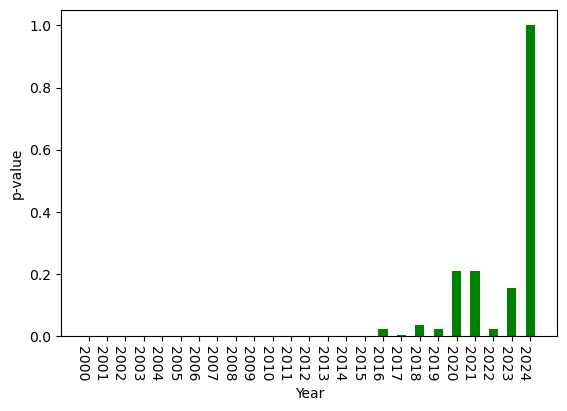

In [174]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
actual_graph = plt.bar(dictionary_pvalues['2024'].keys(), dictionary_pvalues['2024'].values(), 0.5, color='g')

ax.set_xlabel('Year')
ax.set_ylabel('p-value')
fig.autofmt_xdate(rotation=270)
plt.show()

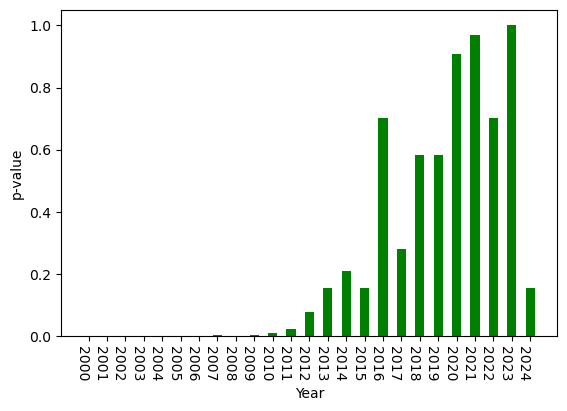

In [176]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dw = plt.bar(dictionary_pvalues['2023'].keys(), dictionary_pvalues['2023'].values(), 0.5, color='g')

ax.set_xlabel('Year')
ax.set_ylabel('p-value')
fig.autofmt_xdate(rotation=270)
plt.show()

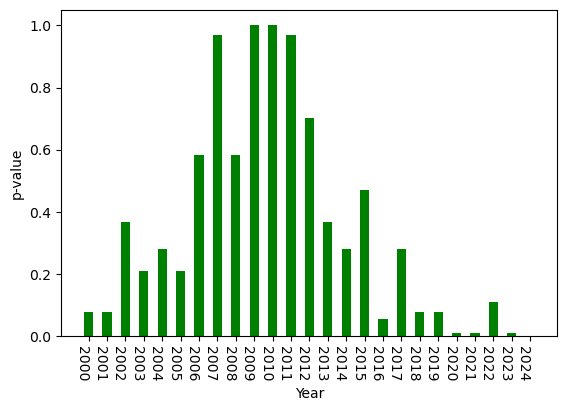

In [177]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ded = plt.bar(dictionary_pvalues['2010'].keys(), dictionary_pvalues['2010'].values(), 0.5, color='g')


ax.set_xlabel('Year')
ax.set_ylabel('p-value')
fig.autofmt_xdate(rotation=270)
plt.show()

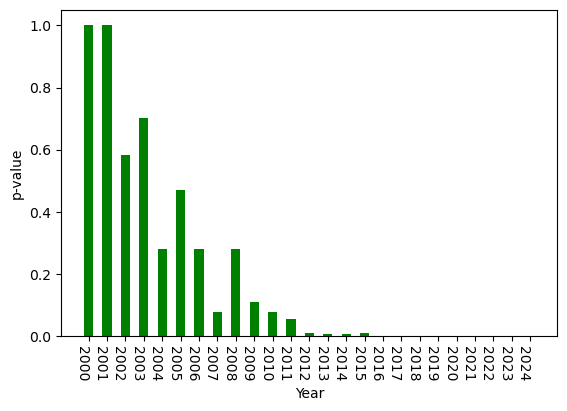

In [178]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
aedex = plt.bar(dictionary_pvalues['2000'].keys(), dictionary_pvalues['2000'].values(), 0.5, color='g')


ax.set_xlabel('Year')
ax.set_ylabel('p-value')
fig.autofmt_xdate(rotation=270)
plt.show()

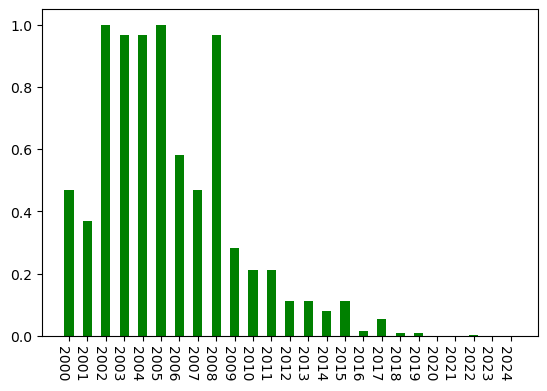

<Figure size 640x480 with 0 Axes>

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plt.bar(dictionary_pvalues['2005'].keys(), dictionary_pvalues['2005'].values(), 0.5, color='g')

fig.autofmt_xdate(rotation=270)
plt.show()

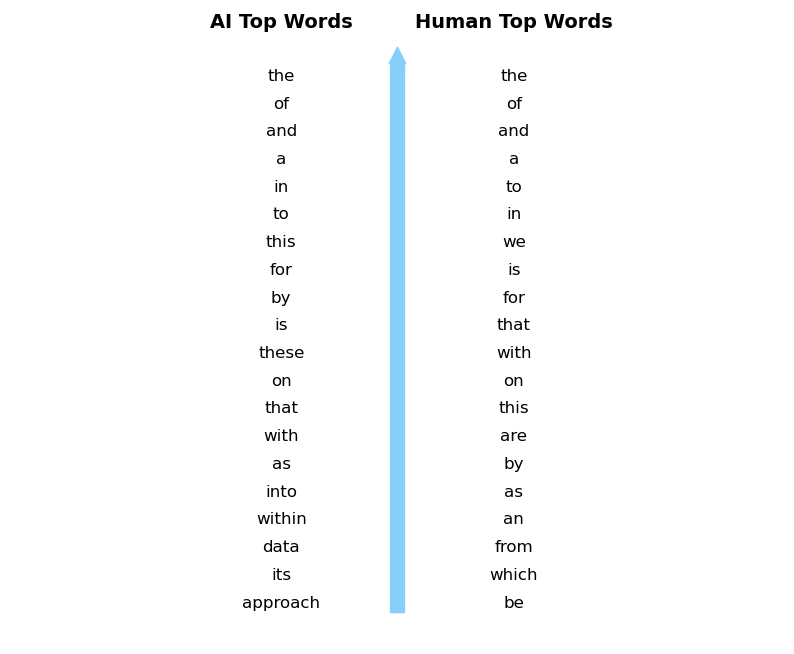

In [160]:
import matplotlib.pyplot as plt

# Lists of words
human_top_words = ['the', 'of', 'and', 'a', 'to', 'in', 'we', 'is', 'for', 'that', 'with', 'on', 'this', 'are', 'by', 'as', 'an', 'from', 'which', 'be']
ai_top_words = ['the', 'of', 'and', 'a', 'in', 'to', 'this', 'for', 'by', 'is', 'these', 'on', 'that', 'with', 'as', 'into', 'within', 'data', 'its', 'approach']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Remove axes
ax.axis('off')

# Plot arrow with a lighter blue color, thicker width, and longer reach
arrow_x = [0.5, 0.5]
arrow_y = [-0.03, 0.99]
ax.annotate('', xy=(arrow_x[1], arrow_y[1]), xytext=(arrow_x[0], arrow_y[0]), 
            arrowprops=dict(facecolor='#87CEFA', edgecolor='#87CEFA', shrink=0.05, width=10))

# Plot lists with centered alignment, some distance from titles
for i, word in enumerate(human_top_words):
    ax.text(0.65, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')
    
for i, word in enumerate(ai_top_words):
    ax.text(0.35, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')

# Titles with centered alignment and more distance from the lists
ax.text(0.35, 0.97, 'AI Top Words', fontsize=14, ha='center', fontweight='bold')
ax.text(0.65, 0.97, 'Human Top Words', fontsize=14, ha='center', fontweight='bold')

# Show plot
plt.show()

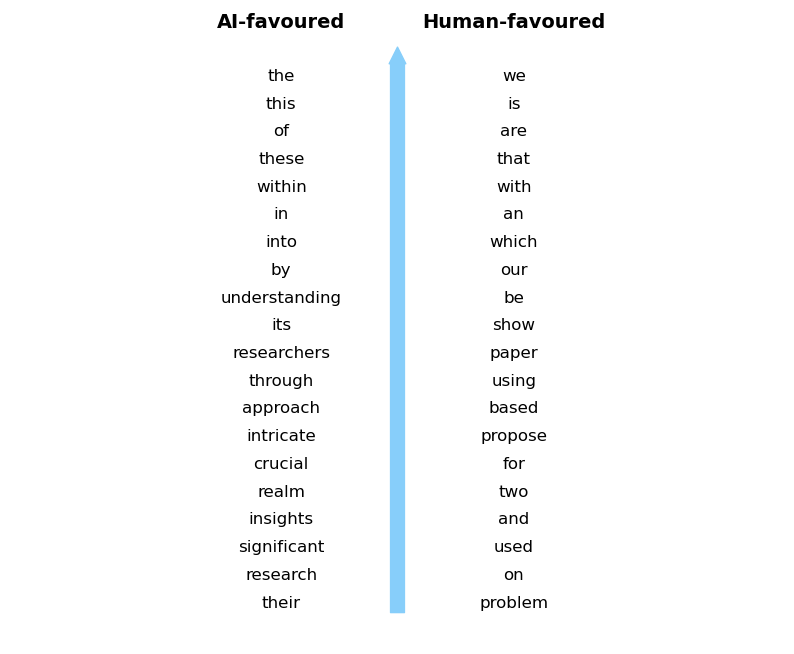

In [163]:
# Lists of words

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Remove axes
ax.axis('off')

# Plot arrow with a lighter blue color, thicker width, and longer reach
arrow_x = [0.5, 0.5]
arrow_y = [-0.03, 0.99]
ax.annotate('', xy=(arrow_x[1], arrow_y[1]), xytext=(arrow_x[0], arrow_y[0]), 
            arrowprops=dict(facecolor='#87CEFA', edgecolor='#87CEFA', shrink=0.05, width=10))

# Plot lists with centered alignment, some distance from titles
for i, word in enumerate(human_favourites[:20]):
    ax.text(0.65, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')
    
for i, word in enumerate(ai_favourites[:20]):
    ax.text(0.35, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')

# Titles with centered alignment and more distance from the lists
ax.text(0.35, 0.97, 'AI-favoured', fontsize=14, ha='center', fontweight='bold')
ax.text(0.65, 0.97, 'Human-favoured', fontsize=14, ha='center', fontweight='bold')

# Show plot
plt.show()

In [167]:
stopwords = ['i', 'within', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",  'moreover',
'aims', 'across', 'utilizing', 'furthermore', 'way', 'e', 'n', 'g', 'two']

ai_favs_clean = [x for x in ai_favourites[:128] if x not in stopwords]
human_favs_clean = [x for x in human_favourites[:128] if x not in stopwords]

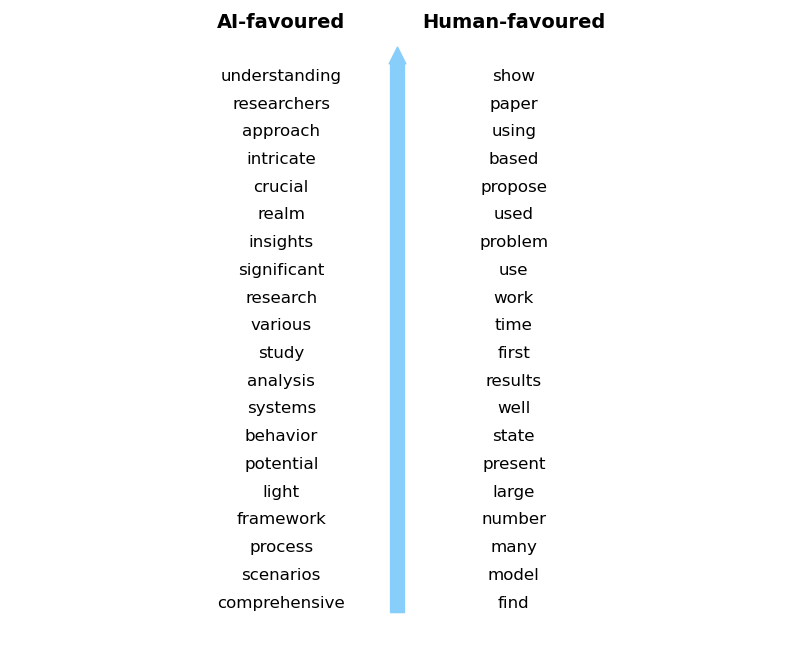

In [168]:
# Lists of words

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Remove axes
ax.axis('off')

# Plot arrow with a lighter blue color, thicker width, and longer reach
arrow_x = [0.5, 0.5]
arrow_y = [-0.03, 0.99]
ax.annotate('', xy=(arrow_x[1], arrow_y[1]), xytext=(arrow_x[0], arrow_y[0]), 
            arrowprops=dict(facecolor='#87CEFA', edgecolor='#87CEFA', shrink=0.05, width=10))

# Plot lists with centered alignment, some distance from titles
for i, word in enumerate(human_favs_clean[:20]):
    ax.text(0.65, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')
    
for i, word in enumerate(ai_favs_clean[:20]):
    ax.text(0.35, 0.93 - (i + 1) * 0.045, word, fontsize=12, ha='center')

# Titles with centered alignment and more distance from the lists
ax.text(0.35, 0.97, 'AI-favoured', fontsize=14, ha='center', fontweight='bold')
ax.text(0.65, 0.97, 'Human-favoured', fontsize=14, ha='center', fontweight='bold')

# Show plot
plt.show()